# Monty Hall problem

Suppose you're on a game show, and you're given the choice of three doors: Behind one door is a car; behind the others, goats. You pick a door, say No. 1, and the host, who knows what's behind the doors, opens another door, say No. 3, which has a goat. He then says to you, "Do you want to pick door No. 2?" Is it to your advantage to switch your choice?



<img src="https://hollamhouse.files.wordpress.com/2016/08/monty-hall-1.jpg" alt="montyhall"
	title="monty hall problem" width="300" height="300" />

Here we'll try to answer to that question empirically. We're just going to participate in the game (10.000 times no less...) and see what is the relative frequency of wins with each choice

In [31]:
import random

def populate():
    doors={}
    options=['goat','goat','car']
    for door in range(len(options)):
        selected=random.choice(options)
        doors[door+1]=selected
        options.remove(selected) 
    return doors

def winner(final_choice,doors):
    return True if doors[final_choice]=='car'else False

#-------------------------------------------------------------

class Presenter:
    
    def __init__(self):
        self.show_doors=populate()
        
    def open_goat_door(self,doors,first_choice):
        for door in doors.keys():
            if doors[door]=='goat'and door!=first_choice:
                del(doors[door])
                return door
        
#--------------------------------------------------------------

class Participant:
    
    def __init__(self):
        return None
    
    def choice(self,doors):
        return random.choice(list(doors.keys()))
    
    def final_choice(self,doors_left):
        return self.choice(doors_left)
            


In [32]:
joe=Presenter()
doors=joe.show_doors
doors                  # Here are the options, hidden for the partcipant, of course

{1: 'car', 2: 'goat', 3: 'goat'}

In [33]:
jane=Participant()
first_choice=jane.choice(doors)
first_choice            # The participant randomly selects one of the doors

2

In [34]:
door_goat=joe.open_goat_door(doors,first_choice)
door_goat                # The presenter opens one of the doors hiding a goat

3

In [35]:
final_choice=jane.final_choice(doors)
final_choice            # The participant finally decides (randomly) to stay with her first option or to shift to the other door

2

In [36]:
winner(final_choice,doors)

False

## let's simulate it

In [37]:
def monty_hall():
    
    pres=Presenter()
    part=Participant()
    
    doors=pres.show_doors
    first_choice=part.choice(doors)
    goat_door=pres.open_goat_door(doors,first_choice)
    final_choice=part.final_choice(doors)
    
    if first_choice!=final_choice:
        change=True
    else:
        change=False
    
    return change,winner(final_choice,doors)
        

In [38]:
def simulate_contest(n):
    results=[]
    for n in range(n):
        results.append(monty_hall())
    return results

In [39]:
results=simulate_contest(5)
results

[(True, True), (False, False), (False, False), (True, True), (True, True)]

In [40]:
change_win=results.count((True,True))
stay_win=results.count((False,True))

In [41]:
change_win

3

In [42]:
stay_win

0

## Now with bigger numbers

In [43]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')

In [44]:
results=simulate_contest(10000)

change_win=results.count((True,True))
stay_win=results.count((False,True))

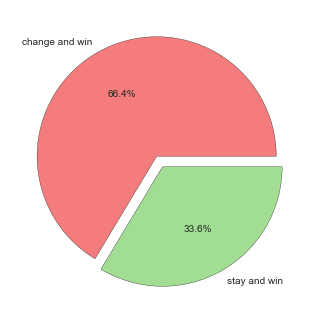

In [45]:
plt.pie([change_win,stay_win],labels=['change and win','stay and win'],
        colors=['#f47c7c','#a1de93'],
        explode=[0,0.1], # separate slices
        autopct='%1.1f%%', # display actual % of each slice
        wedgeprops={'edgecolor':'black'});

# What should we do?

Well, It's very clear that the best option is to change the door to maximize the chances of winning the car.

But just if we want the car...

<img src="https://www.explainxkcd.com/wiki/images/8/8e/monty_hall.png
" alt="alternativeending"
	title="what if I want the goat" width="500" height="500" />